In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [10]:
data = pd.read_csv("../data.txt", sep = ' ', header = None)
data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [8]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)
dplot.shape

(2313682, 8)

In [11]:
s = 31.0
data = data[data[3]==s]
data.head()

,0,1,2,3,4,5,6,7
1230612,2004-02-28,00:58:46.910403,2,31.0,19.5572,39.0763,150.88,2.69964
1230613,2004-02-28,00:59:46.80308,4,31.0,19.2632,39.7217,143.52,2.69964
1230614,2004-02-28,01:00:46.499456,6,31.0,19.0280,40.4328,150.88,2.69964
1230615,2004-02-28,01:01:16.831785,7,31.0,18.9496,40.3652,150.88,2.69964
1230616,2004-02-28,01:02:16.863482,9,31.0,18.8320,40.7368,150.88,2.69964


In [12]:
# print(S1df.shape)
outliersILista = []
outliersIListaV = []
for i, row in data.iterrows():
    if row[4] >=26.2 :
        outliersILista.append(i)
        outliersIListaV.append(row[4])
print(data.shape, len(outliersILista))
# Removendo outliers no sensor
passo3= data.copy()
print(passo3.head())
print(passo3.shape)

(65694, 8) 22569
                  0                1  2     3        4        5       6  \
1230612  2004-02-28  00:58:46.910403  2  31.0  19.5572  39.0763  150.88   
1230613  2004-02-28   00:59:46.80308  4  31.0  19.2632  39.7217  143.52   
1230614  2004-02-28  01:00:46.499456  6  31.0  19.0280  40.4328  150.88   
1230615  2004-02-28  01:01:16.831785  7  31.0  18.9496  40.3652  150.88   
1230616  2004-02-28  01:02:16.863482  9  31.0  18.8320  40.7368  150.88   

               7  
1230612  2.69964  
1230613  2.69964  
1230614  2.69964  
1230615  2.69964  
1230616  2.69964  
(65694, 8)


In [13]:
passo3= passo3.drop(outliersILista)
print(passo3.shape)
passo3.to_csv('sensor.csv')
data = pd.read_csv("sensor.csv")
data.shape
data.drop(['Unnamed: 0'], axis=1,inplace=True)
# data.head(1)
for key,d in data[:data.shape[0]].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

(43125, 8)
31.0 
             0                1  2     3        4        5       6        7
0  2004-02-28  00:58:46.910403  2  31.0  19.5572  39.0763  150.88  2.69964
1  2004-02-28   00:59:46.80308  4  31.0  19.2632  39.7217  143.52  2.69964
2  2004-02-28  01:00:46.499456  6  31.0  19.0280  40.4328  150.88  2.69964
3  2004-02-28  01:01:16.831785  7  31.0  18.9496  40.3652  150.88  2.69964
4  2004-02-28  01:02:16.863482  9  31.0  18.8320  40.7368  150.88  2.69964
--------------------------------


In [15]:
for key, d in data[:data.shape[0]].groupby('3'):
    break
    d.head()

d = d.sort_values(['0','1'],ascending = [1,1])
d.shape, (d.tail())

((43125, 8),
                 0                1      2     3   4   5   6        7
 31343  2004-03-29  06:24:57.779526  50577  31.0 NaN NaN NaN  2.21612
 31409  2004-03-29  07:03:57.876665  50655  31.0 NaN NaN NaN  2.19159
 31417  2004-03-29  07:07:54.887443  50663  31.0 NaN NaN NaN  2.19159
 31420  2004-03-29  07:10:26.978517  50668  31.0 NaN NaN NaN  2.19159
 373    2004-03-29  17:02:42.235582    492  31.0 NaN NaN NaN  2.16759)

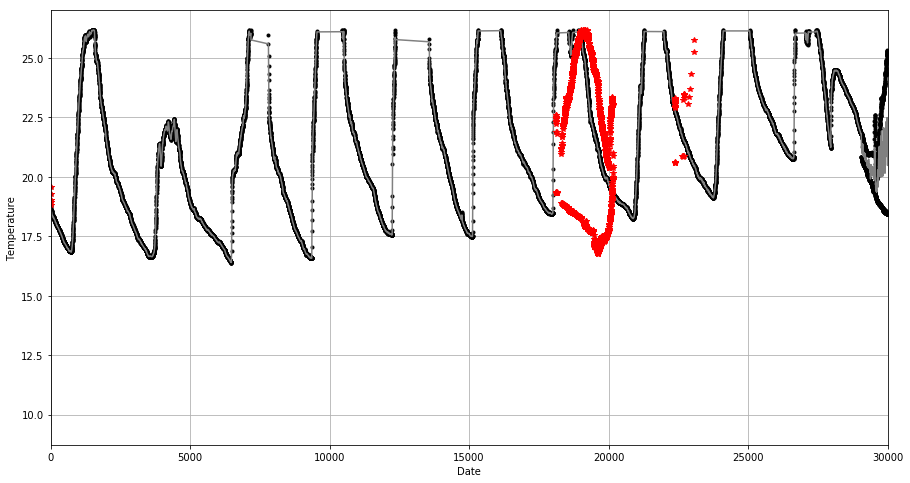

In [16]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = data[:data.shape[0]]['2']
Y = data[:data.shape[0]]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")



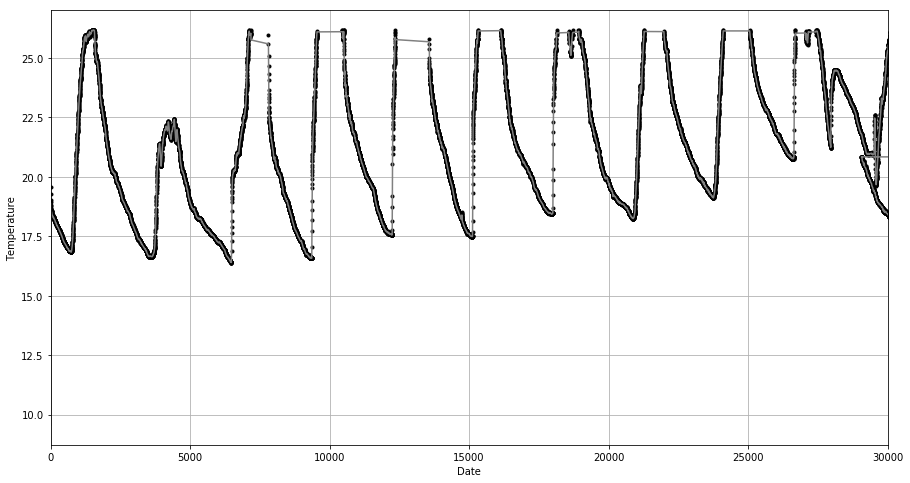

In [17]:
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

plot_results2(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

In [18]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    print(len(x_anomaly))
    return x_anomaly

x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

318


array([    0,     1,     2,     3,     4,  4630,  4631,  4632,  4635,
        4636,  4638,  4639,  4640,  4641,  4642,  5175,  5176,  5177,
        5178,  5180,  5181,  5182,  5183,  5184,  5185,  5190,  6484,
        6485,  6486,  6488,  6489,  6490,  6491,  6492,  6493,  6494,
        6495,  6700,  6701,  6714,  6715,  6716,  6717,  6718,  6719,
        6720,  6721,  6722,  6723,  6733,  6745,  6764,  6769,  6773,
        6807,  6843,  6855,  6861,  8117,  8118,  8119,  8120,  8121,
        8123,  8124,  8125,  8126,  8127,  8129,  8130,  8199,  8200,
        8201,  8205,  8206,  8207,  9563,  9564,  9565,  9566,  9568,
        9569,  9570,  9571,  9572,  9573,  9575,  9576, 10935, 10936,
       10937, 10938, 10941, 10942, 10943, 10944, 10945, 10946, 10947,
       11065, 11067, 11068, 15981, 15982, 15983, 15984, 15986, 15987,
       15988, 15989, 15990, 15991, 15994, 15997, 16495, 16496, 16497,
       16499, 16500, 16501, 16502, 16503, 16504, 16505, 17731, 17732,
       17734, 17735,

(43125, 8)
(42807, 8)
318


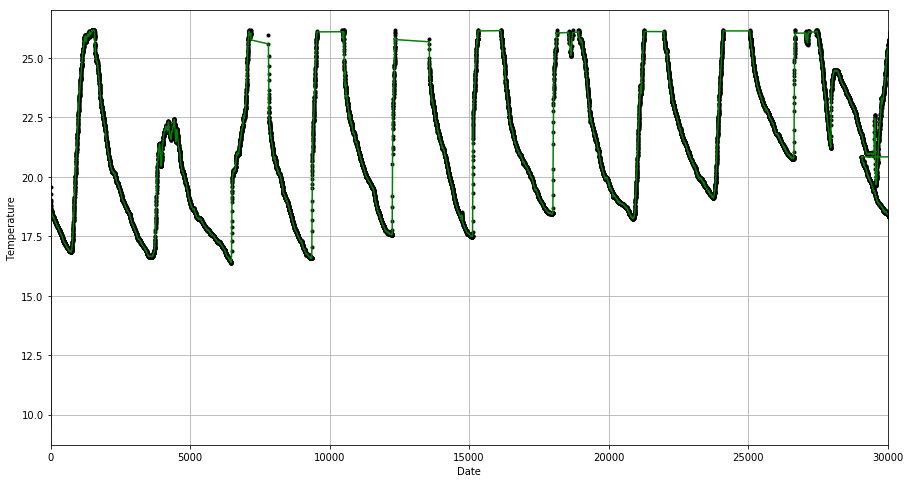

In [19]:
## Checando e removendo outliers no step 3.
passoO= d[:d.shape[0]].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:d.shape[0]]['2']
YF = d[:d.shape[0]]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

# Depois de ter os dados reconstruídos - verificamos a série temporal

4837


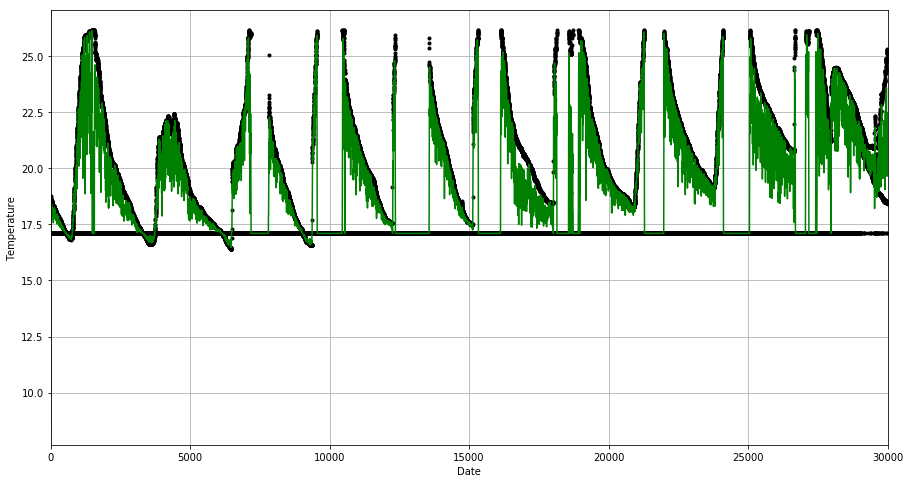

In [33]:
# Final reconstrução - passo 3 # Executar depois de gerar o dataframe teste no scrip do sensor
xF = teste['2']
YF = teste['4']

plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")


# Estatísticas Simples

In [21]:
dplot[dplot['Moteid']==s].shape
# Passo 0
sensor = s
myDicInit = {
    'Data type':['Raw Data'],
    'size':[dplot[dplot['Moteid']==sensor].shape[0]], # Pegamos o shape dos dados brutos de dplot para cada sensor
    'mean':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mean(),
    'SD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].std(), 
    'median':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].median(),
    'MAD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,65694,41.774647,38.937329,23.1244,30.57713


In [22]:
# Passo 1
myDic = {
    'Data type':['step 1 (BOR)'],
    'size':[d.shape[0]], # d.shape[0] sensor
    'mean':d[:d.shape[0]]['4'].mean(),
    'SD':d[:d.shape[0]]['4'].std(), 
    'median':d[:d.shape[0]]['4'].median(),
    'MAD':d[:d.shape[0]]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,step 1 (BOR),43125,21.32703,2.389638,21.1448,1.963964


In [23]:
# Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

42807


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,42807,21.319163,2.388252,21.135,1.96264


# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip sx_sy_sz-FI 

In [31]:
# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip s2_s1_s3-FI 

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,19.736719,2.790124,19.1652,2.422639


In [32]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )

  Data type   size       mean         SD   median       MAD
0  Raw Data  65694  41.774647  38.937329  23.1244  30.57713
      Data type   size      mean        SD   median       MAD
0  step 1 (BOR)  43125  21.32703  2.389638  21.1448  1.963964
     Data type   size       mean        SD  median      MAD
0  step 2 (AOR  42807  21.319163  2.388252  21.135  1.96264
  Data type   size       mean        SD   median       MAD
0    step 3  65536  19.736719  2.790124  19.1652  2.422639


##  Etapa para reconstruir as Épocas que estão faltando

In [25]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)
passoOEp = passoO['2'].tolist()
len(passoOEp)

idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))

24608
65536 40928


In [26]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])

data.shape, type( len(resultIntersecEp) ), dfHora.head(1)

((43125, 8), int,              1
 2004-02-28  81)

In [27]:
# tamanho resultIntersecEp # CSV das épocas faltantes
listofzeros = [0] * len(resultIntersecEp)

#len(resultIntersecEp)
myDicNewdf2 = {
    '0':dplot[:len(resultIntersecEp)]['Date'],
    '1':dplot[:len(resultIntersecEp)]['Time'],#data[:32828]['1']
    '2':resultIntersecEp[:len(resultIntersecEp)],
    '3':dplot[:len(resultIntersecEp)]['Moteid'], 
    '4':listofzeros,
    '5':dplot[:len(resultIntersecEp)]['Humidity'],
    '6':dplot[:len(resultIntersecEp)]['Light'],
    '7':dplot[:len(resultIntersecEp)]['Voltage']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
# dfOut.tail(10)


24608


# Gerando o csv para fazer reconstrução dos dados

In [28]:
# Gerando o csv para fazer reconstrução dos dados
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.tail(10)
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

(67415, 8)


# Depois de ter obtido o resultado do script joga o resultado aqui

In [30]:
final= pd.read_csv('finalsensor.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (67415, 8))